<a href="https://colab.research.google.com/github/mffg1993/LabToolsForNewbiesWithPython/blob/main/CurveFittingInPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Curve Fitting in Python: A Lab Tutorial

## 🎯 Objective
Learn how to fit a curve to experimental data using Python’s multiple options!



## 1. Nonlinear curve fitting

### Step 0. Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Step 1: Simulate Some Data
In real experiments, you'd read data from a file. Here, we'll simulate noisy data for learning.

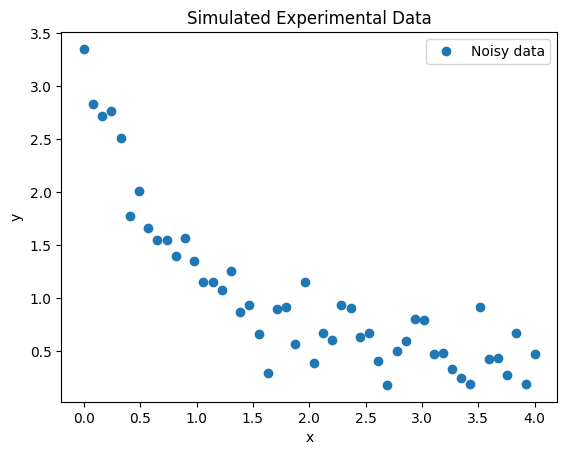

In [ ]:
# True function: y = a * exp(-b * x) + c
def true_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Simulated x data
x_data = np.linspace(0, 4, 50)

# Generate noisy y data
np.random.seed(0)
y_data = true_func(x_data, a=2.5, b=1.3, c=0.5) + 0.2 * np.random.normal(size=len(x_data))

plt.plot(x_data, y_data, 'o', label='Noisy data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Experimental Data')
plt.legend()
plt.show()

### Step 2: Define the Model You Expect

In [ ]:
# Same form as true_func, but we don't know the parameters
def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

### Step 3: Fit the Curve

In [ ]:
# Fit the model to the data
popt, pcov = curve_fit(model_func, x_data, y_data)

# popt contains optimal values for a, b, c
print("Fitted parameters:", popt)

Fitted parameters: [2.80720814 1.24568449 0.44517316]


### Step 4: Plot the Fit

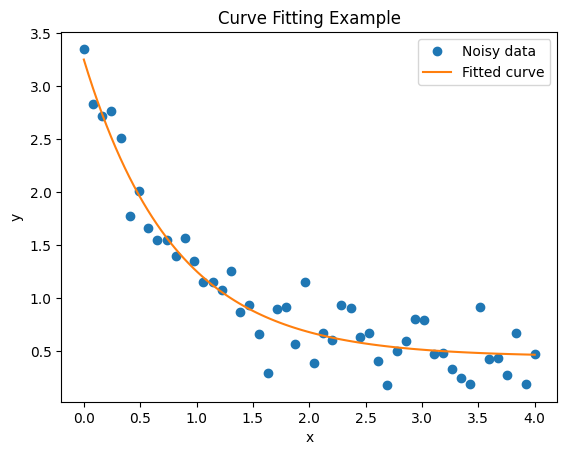

In [ ]:
# Plot original data
plt.plot(x_data, y_data, 'o', label='Noisy data')

# Plot fitted curve
x_fit = np.linspace(0, 4, 100)
y_fit = model_func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-', label='Fitted curve')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting Example')
plt.legend()
plt.show()

## 2. Polynomial Curve Fitting

### 🔢 Step 1: Generate Simulated Data
We'll use a known quadratic function to generate noisy data.

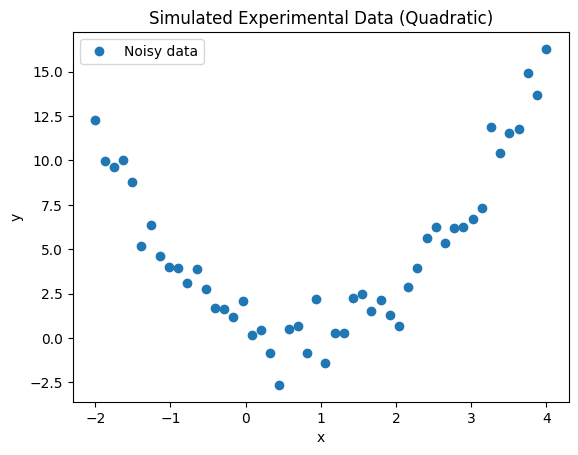

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true function (quadratic)
def true_func(x):
    return 1.5 * x**2 - 2.0 * x + 0.5

# Simulated x data
x_data = np.linspace(-2, 4, 50)

# Generate noisy y data
np.random.seed(0)
y_data = true_func(x_data) + np.random.normal(0, 1.0, size=x_data.size)

# Plot the noisy data
plt.plot(x_data, y_data, 'o', label='Noisy data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Experimental Data (Quadratic)')
plt.legend()
plt.show()


### 🧠 Step 2: Fit a Polynomial to the Data

In [ ]:
# Fit a 2nd-degree polynomial
degree = 2
coeffs = np.polyfit(x_data, y_data, degree)

# Create a polynomial function from the coefficients
poly_model = np.poly1d(coeffs)

# Print the fitted polynomial
print("Fitted polynomial:")
print(poly_model)

Fitted polynomial:
       2
1.526 x - 2.286 x + 0.8215


### 📊 Step 3: Plot the Fitted Curve

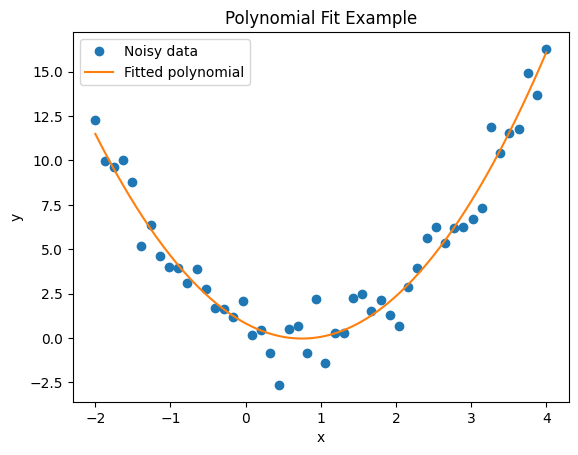

In [ ]:
# Plot data
plt.plot(x_data, y_data, 'o', label='Noisy data')

# Plot polynomial fit
x_fit = np.linspace(min(x_data), max(x_data), 200)
y_fit = poly_model(x_fit)
plt.plot(x_fit, y_fit, '-', label='Fitted polynomial')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit Example')
plt.legend()
plt.show()


## 3. Linear Regression

###🎯 Objective
Fit a straight line to noisy data using linear regression.


### 🔢 Step 1: Generate Simulated Linear Data

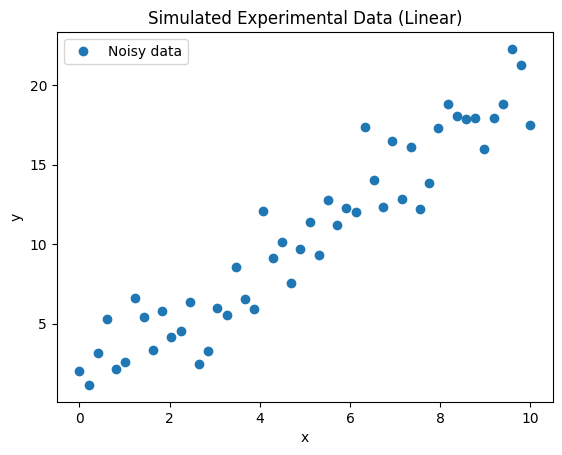

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define true linear relationship
def true_func(x):
    return 2.0 * x + 1.0

# Simulate x values
x_data = np.linspace(0, 10, 50)

# Add noise
np.random.seed(42)
y_data = true_func(x_data) + np.random.normal(0, 2.0, size=x_data.size)

# Plot noisy data
plt.plot(x_data, y_data, 'o', label='Noisy data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Experimental Data (Linear)')
plt.legend()
plt.show()

### 🧠 Step 2: Perform Linear Regression

In [ ]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

# Print results
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")

Slope: 1.884
Intercept: 1.129
R-squared: 0.903


### 📊 Step 3: Plot the Fitted Line

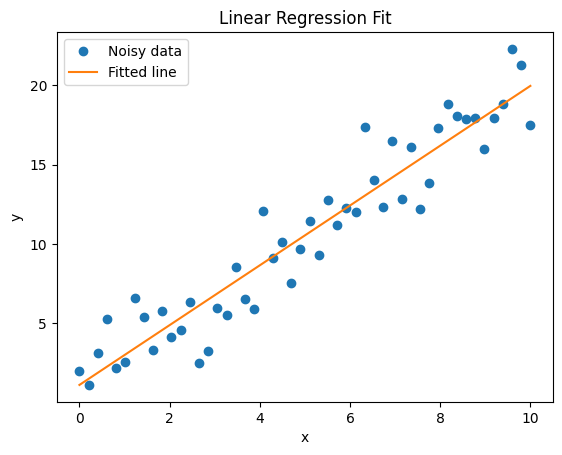

In [ ]:
# Plot original data
plt.plot(x_data, y_data, 'o', label='Noisy data')

# Plot regression line
y_fit = slope * x_data + intercept
plt.plot(x_data, y_fit, '-', label='Fitted line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()